In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


In [6]:
cancer =load_breast_cancer()

In [7]:
X = pd.DataFrame (cancer['data'],columns=cancer.feature_names)
y = pd.DataFrame(cancer['target'])


<AxesSubplot:>

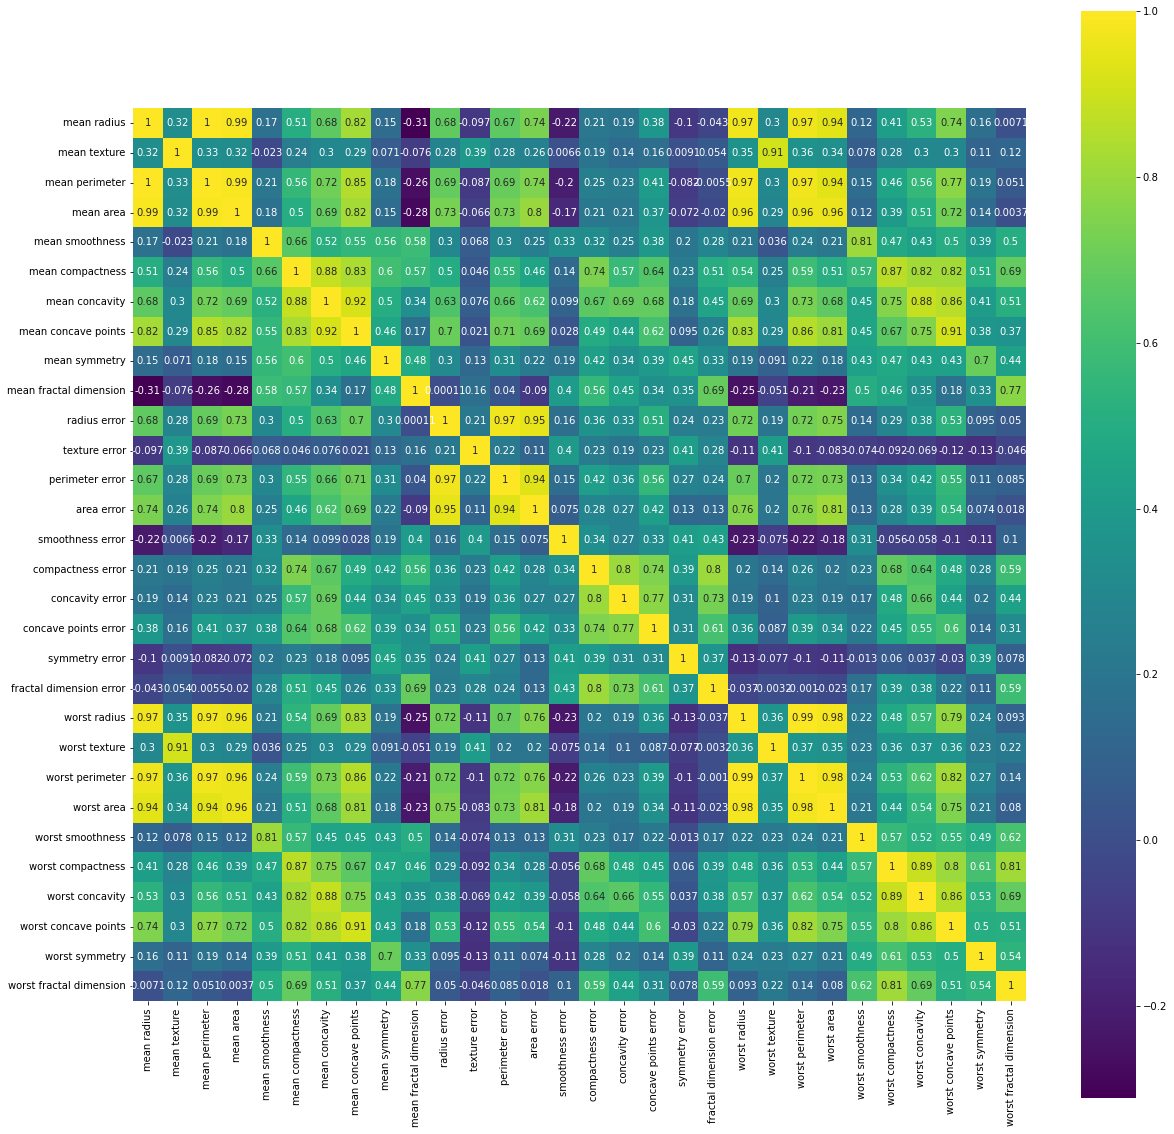

In [8]:
def corr(x):
    correlation = x.corr()
    return correlation

corr = corr(X)
plt.figure(figsize=(20,20))

sns.heatmap(corr,square=True,annot=True,cmap='viridis',)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)

clf.fit(X_train,y_train)
df = pd.DataFrame(clf.cv_results_)
df

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011701,0.001998,0.005189,0.000405,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.627907,0.635294,0.635294,0.623529,0.623529,0.629111,0.005296,4
1,0.646613,0.334724,0.001596,0.000488,1,linear,"{'C': 1, 'kernel': 'linear'}",0.953488,0.941176,0.988235,0.929412,0.905882,0.943639,0.027276,3
2,0.010172,0.000399,0.004788,0.000399,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.627907,0.635294,0.635294,0.623529,0.623529,0.629111,0.005296,4
3,1.730363,0.660104,0.001584,0.000498,10,linear,"{'C': 10, 'kernel': 'linear'}",0.953488,0.952941,0.988235,0.941176,0.905882,0.948345,0.026432,2
4,0.010681,0.000393,0.004583,0.000495,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.627907,0.635294,0.635294,0.623529,0.623529,0.629111,0.005296,4
5,2.030674,0.758899,0.001297,0.000400,20,linear,"{'C': 20, 'kernel': 'linear'}",0.965116,0.941176,0.988235,0.952941,0.917647,0.953023,0.023571,1


In [12]:
clf.best_params_

{'C': 20, 'kernel': 'linear'}

In [13]:
classifier = SVC(kernel='linear',C=20,gamma='auto')
model = classifier.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
model_score = model.score(X_train,y_train)
model_score

0.9577464788732394

In [34]:
score = model.score(X_test,y_test)
print(f'''
    model score for test instances are {round(score,2)}''')


    model score for test instances are 0.99
